# Challenge 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Loading data

In [186]:
file_path = 'Mta_2019_df.pickle'

mta_df = pd.read_pickle(file_path)

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


## Stripping spaces from column names

In [187]:
mta_df.columns = [column.strip() for column in mta_df.columns]

## Dividing up all stations by line (result is that station names are station-line)

In [188]:
mta_df['STATION'] = mta_df['STATION'] + ' ' + mta_df['LINENAME']

# mta_df['STATION'] = [name.strip() for name in mta_df['STATION']]

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667


## Dividing up 23rd street station

In [189]:
# df_23_ST = mta_df[mta_df['STATION'] == '23 ST']

# # adding line names to 23rd st station

# df_23_ST['STATION'] = df_23_ST['STATION'] + ' ' + df_23_ST['LINENAME']

# # All the other stations

# filt_NOT_23ST = mta_df.loc[mta_df['STATION'] != '23 ST']
# filt_NOT_23ST

# # Putting the two back together

# mta_df = pd.concat([filt_NOT_23ST, df_23_ST])
# mta_df.head()

# Challenge 2

## Adding date_time column

In [190]:
# mta_df["DATETIME"] = pd.to_datetime(mta_df['DATE'] + ' ' + mta_df['TIME'])

mta_df["DATETIME"] = pd.to_datetime(mta_df["DATE"] + " " + mta_df["TIME"], format="%m/%d/%Y %H:%M:%S")

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00


# Challenge 3

## Adding turnstile column

In [191]:
# Adding turnstile column

mta_df['TURNSTILE'] = mta_df['C/A'] + ' ' + mta_df['UNIT'] + ' ' + mta_df['SCP'] + ' ' + mta_df['STATION']

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00,A002 R051 02-00-00 59 ST NQR456W
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00,A002 R051 02-00-00 59 ST NQR456W


Ignoring the duplicate check step as it makes ENTRIES and EXIT columns all the same

In [192]:
# Checking that turnstile combos are really unique:

# (mta_df
#  .groupby(['TURNSTILE', 'DATETIME'])
#  .ENTRIES.count()
#  .reset_index()
#  .sort_values("ENTRIES", ascending=False)).head(5)

In [193]:
# Remove duplicates

# mta_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], 
#                           inplace=True, ascending=False)

# mta_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

# mta_df.drop_duplicates(subset=["TURNSTILE"], inplace=True)

# mta_df.head(5)

In [194]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_df
 .groupby(["TURNSTILE", "DATETIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,TURNSTILE,DATETIME,ENTRIES
1093003,N306 R017 00-00-01 LEXINGTON AV/53 EM6,2019-05-23 04:00:00,2
912822,N120A R153 01-05-01 UTICA AV AC,2019-05-19 13:00:00,2
1177826,N330 R202 00-00-02 63 DR-REGO PARK MR,2019-05-23 12:00:00,2
1177827,N330 R202 00-00-02 63 DR-REGO PARK MR,2019-05-23 16:00:00,2
1177828,N330 R202 00-00-02 63 DR-REGO PARK MR,2019-05-23 20:00:00,2


In [195]:
mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,TURNSTILE
0,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,00:00:00,REGULAR,6980704,2367517,2019-03-16 00:00:00,A002 R051 02-00-00 59 ST NQR456W
1,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,04:00:00,RECOVR AUD,6980727,2367519,2019-03-16 04:00:00,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,08:00:00,RECOVR AUD,6980747,2367546,2019-03-16 08:00:00,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,12:00:00,REGULAR,6980855,2367610,2019-03-16 12:00:00,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,NQR456W,BMT,03/16/2019,16:00:00,REGULAR,6981109,2367667,2019-03-16 16:00:00,A002 R051 02-00-00 59 ST NQR456W


## Making daily frames

In [248]:

mta_daily = (mta_df
                .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)  #do not group by turnstile!! That will screw up box plot later
                .ENTRIES.first())


# did not end up using this frame:

# turnstiles_daily = (mta_df             
#                         .groupby(["TURNSTILE","DATE", ],as_index=False)
#                         .ENTRIES.first())



In [249]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST NQR456W,03/16/2019,6980704
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159


## Adding previous date and entries columns

In [250]:
mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily
                                                .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                .apply(lambda grp: grp.shift(1)))

<ipython-input-250-a8c68b31b527>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily


In [251]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST NQR456W,03/16/2019,6980704,NaN,NaN
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0


## Drop the rows for the earliest date in the df


In [252]:
mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0


## Counters in reverse?

In [253]:
mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
7653,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/17/2019,1238618405,03/16/2019,1.238622e+09
7654,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/18/2019,1238615918,03/17/2019,1.238618e+09
7655,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/19/2019,1238611834,03/18/2019,1.238616e+09
7656,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/20/2019,1238607734,03/19/2019,1.238612e+09
7657,A025,R023,01-03-01,34 ST-HERALD SQ BDFMNQRW,03/21/2019,1238603605,03/20/2019,1.238608e+09


## Let's see how many stations have this problem


In [254]:
(mta_daily[mta_daily["ENTRIES"] < mta_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION                 
A025  R023  01-03-01  34 ST-HERALD SQ BDFMNQRW    97
A037  R170  05-00-00  14 ST-UNION SQ LNQR456W      1
A038  R085  00-00-01  8 ST-NYU NRW                 1
A039  R085  01-00-01  8 ST-NYU NRW                 1
A042  R086  01-00-04  PRINCE ST NRW                1
                                                  ..
R623  R061  00-00-01  NOSTRAND AV 3                2
R629  R065  00-00-00  ROCKAWAY AV 3                1
R645  R110  00-03-00  FLATBUSH AV-B.C 25           1
R646  R110  01-00-01  FLATBUSH AV-B.C 25          97
R730  R431  00-00-04  EASTCHSTER/DYRE 5           93
Length: 568, dtype: int64

## Fixing counter

In [256]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
#         print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=40000)

In [257]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0


## Examine distribution

/Users/noah/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


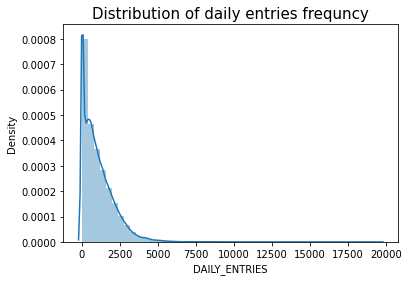

In [311]:
sns.distplot(mta_daily['DAILY_ENTRIES']
             [mta_daily['DAILY_ENTRIES'] < 20000]).set_title('Distribution of daily entries frequncy',  size=15);

## First get daily entries by station

In [259]:
stations_daily = \
(mta_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV L,03/17/2019,5.0
1,1 AV L,03/18/2019,2.0
2,1 AV L,03/19/2019,18473.0
3,1 AV L,03/20/2019,19996.0
4,1 AV L,03/21/2019,20027.0


## Then get top 10 stations by daily volume 

In [265]:
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

313           GRD CNTRL-42 ST 4567S
90         34 ST-HERALD SQ BDFMNQRW
103    42 ST-PORT AUTH ACENQRS1237W
94               34 ST-PENN STA ACE
28          14 ST-UNION SQ LNQR456W
449     TIMES SQ-42 ST 1237ACENQRSW
124            59 ST COLUMBUS ABCD1
303              FULTON ST 2345ACJZ
107             47-50 STS ROCK BDFM
405                  PATH NEW WTC 1
Name: STATION, dtype: object

## Next create a new df that filters the stations daily data down to the top 10

In [266]:
station_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)].sort_values(by = 'DAILY_ENTRIES', ascending = False)

In [267]:
station_daily_top10.head()

,STATION,DATE,DAILY_ENTRIES
39069,PATH NEW WTC 1,06/05/2019,222918.0
30230,GRD CNTRL-42 ST 4567S,06/19/2019,176774.0
30210,GRD CNTRL-42 ST 4567S,05/30/2019,175321.0
30141,GRD CNTRL-42 ST 4567S,03/22/2019,173631.0
30195,GRD CNTRL-42 ST 4567S,05/15/2019,172619.0


## Plot top 10

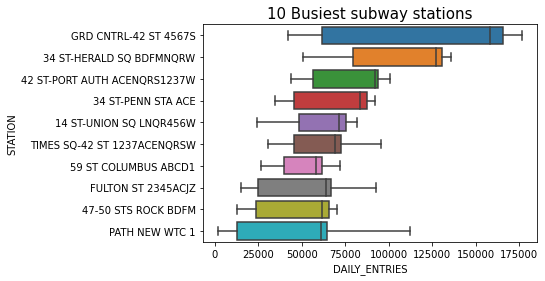

In [310]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', 
        data=station_daily_top10,  order = top10_stations, showfliers = False)\
            .set_title('10 Busiest subway stations',  size=15);

### Note: Changing stations to stations + line (see above) changes this fig a bit. Is this what we want?

# Challenge 4

In [269]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0


## Adding turnstile column to daily frame

In [270]:
mta_daily['TURNSTILE'] = mta_daily['C/A'] + ' ' + mta_daily['UNIT'] + ' ' + mta_daily['SCP'] + ' ' + mta_daily['STATION']

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0,A002 R051 02-00-00 59 ST NQR456W
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0,A002 R051 02-00-00 59 ST NQR456W


In [271]:
mta_daily['TURNSTILE'].value_counts()

N701 R571 00-05-01 86 ST-2 AVE Q         97
R617 R058 00-00-02 BERGEN ST 23          97
R135 R031 01-00-02 34 ST-PENN STA 123    97
N067 R012 00-00-04 34 ST-PENN STA ACE    97
R551 R072 01-03-00 34 ST-HUDSON YD 7     97
                                         ..
N071 R013 00-03-02 34 ST-PENN STA ACE     1
N071 R013 00-03-00 34 ST-PENN STA ACE     1
N071 R013 00-05-01 34 ST-PENN STA ACE     1
N071 R013 00-03-04 34 ST-PENN STA ACE     1
PTH02 R544 00-00-08 HARRISON 1            1
Name: TURNSTILE, Length: 4907, dtype: int64

## Examining a single turnstile

In [272]:
# Getting a single turnstile

mask = mta_daily['TURNSTILE'] == 'A002 R051 02-00-00 59 ST NQR456W' # does not work with station names being station+line

# mask = mta_daily['TURNSTILE']=='R116 R030 00-06-00 CHAMBERS ST  123'  # use this if organizing by station+line

one_turn = mta_daily[mask]

one_turn.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0,A002 R051 02-00-00 59 ST NQR456W
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0,A002 R051 02-00-00 59 ST NQR456W


## Examining a single turnstile for a single day

In [273]:
# Making new grouped frame by day

one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()

# one_turn_daily = one_turn.groupby(['TURNSTILE', 'DATE'])['DAILY_ENTRIES'].sum().reset_index()


one_turn_daily.head()

,TURNSTILE,DATE,DAILY_ENTRIES
0,A002 R051 02-00-00 59 ST NQR456W,03/17/2019,860.0
1,A002 R051 02-00-00 59 ST NQR456W,03/18/2019,570.0
2,A002 R051 02-00-00 59 ST NQR456W,03/19/2019,1512.0
3,A002 R051 02-00-00 59 ST NQR456W,03/20/2019,1513.0
4,A002 R051 02-00-00 59 ST NQR456W,03/21/2019,1583.0


## Plotting one turnstile by day for 50 days

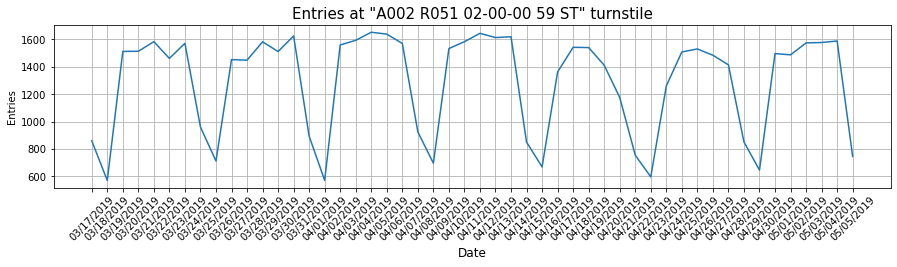

In [303]:
# one turnstile, by day, for 50 days

x = one_turn_daily['DATE'][:50]
y = one_turn_daily['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.plot(x, y)
plt.grid()
plt.xlabel('Date', size = 12)
plt.ylabel('Entries')
plt.xticks(rotation=45)
plt.title('Entries at {} turnstile'.format('"A002 R051 02-00-00 59 ST"'), size=15);


# Challenge 5

## Grouping by ControlArea/UNIT/STATION combo

In [275]:
# turnstiles_daily.head()

# CA_U_S = turnstiles_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum()

CA_U_S = mta_daily.groupby(['C/A', 'UNIT', 'STATION', 'DATE'], as_index = False).sum()

CA_U_S.head()

,C/A,UNIT,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,59 ST NQR456W,03/17/2019,54628927,54621134.0,7793.0
1,A002,R051,59 ST NQR456W,03/18/2019,54634897,54628927.0,5970.0
2,A002,R051,59 ST NQR456W,03/19/2019,54647660,54634897.0,12763.0
3,A002,R051,59 ST NQR456W,03/20/2019,54660981,54647660.0,13321.0
4,A002,R051,59 ST NQR456W,03/21/2019,54674499,54660981.0,13518.0


# Challenge 6

## Grouping by station

In [276]:
# stations_daily = turnstiles_daily.groupby(['STATION', 'DATE']).sum()

stations_grouped_df = mta_daily.groupby(['STATION', 'DATE'], as_index = False).sum()

stations_grouped_df.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV L,03/17/2019,1412586439,1.412586e+09,5.0
1,1 AV L,03/18/2019,1412586441,1.412586e+09,2.0
2,1 AV L,03/19/2019,1412604914,1.412586e+09,18473.0
3,1 AV L,03/20/2019,1412624910,1.412605e+09,19996.0
4,1 AV L,03/21/2019,1412644937,1.412625e+09,20027.0


In [277]:
stations_grouped_df['STATION'].value_counts()

168 ST 1AC                  97
BRONX PARK EAST 25          97
E 143/ST MARY'S 6           97
KEW GARDENS EF              97
34 ST-HERALD SQ BDFMNQRW    97
                            ..
5 AVE 7BDFM                 92
135 ST 23                   91
ORCHARD BEACH 6             31
111 ST J                    13
ASTORIA BLVD NQW             2
Name: STATION, Length: 479, dtype: int64

# Challenge 7

## Extracting a single station

In [278]:
# mask = stations_grouped_df['STATION'] == '86 ST  R'  # Use this if station = station+line above

mask = stations_grouped_df['STATION'] == '1 AV L'

one_station = stations_grouped_df[mask]

one_station.head()

,STATION,DATE,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
0,1 AV L,03/17/2019,1412586439,1.412586e+09,5.0
1,1 AV L,03/18/2019,1412586441,1.412586e+09,2.0
2,1 AV L,03/19/2019,1412604914,1.412586e+09,18473.0
3,1 AV L,03/20/2019,1412624910,1.412605e+09,19996.0
4,1 AV L,03/21/2019,1412644937,1.412625e+09,20027.0


## Plotting daily entries for one station

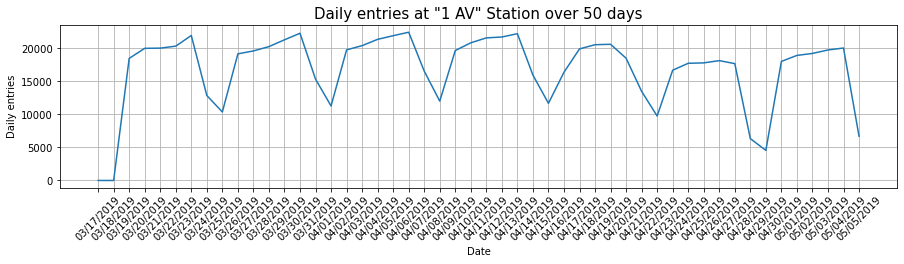

In [279]:
x = one_station['DATE'][:50]
y = one_station['DAILY_ENTRIES'][:50]

plt.figure(figsize=(15,3))
plt.grid()
plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Daily entries')
# plt.title('Daily entries at "86 ST  R" Station over 50 days', size=15) # Use this if station = station+line above
plt.title('Daily entries at "1 AV" Station over 50 days', size=15)

plt.xticks(rotation=45);

# Challenge 8

In [280]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0,A002 R051 02-00-00 59 ST NQR456W
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0,A002 R051 02-00-00 59 ST NQR456W
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0,A002 R051 02-00-00 59 ST NQR456W
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0,A002 R051 02-00-00 59 ST NQR456W
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0,A002 R051 02-00-00 59 ST NQR456W


## Adding weekday column to mta_daily

In [281]:
mta_daily['WEEK_DAY'] = pd.to_datetime(mta_daily['DATE']).dt.dayofweek

mta_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,TURNSTILE,WEEK_DAY
1,A002,R051,02-00-00,59 ST NQR456W,03/17/2019,6981564,03/16/2019,6980704.0,860.0,A002 R051 02-00-00 59 ST NQR456W,6
2,A002,R051,02-00-00,59 ST NQR456W,03/18/2019,6982134,03/17/2019,6981564.0,570.0,A002 R051 02-00-00 59 ST NQR456W,0
3,A002,R051,02-00-00,59 ST NQR456W,03/19/2019,6983646,03/18/2019,6982134.0,1512.0,A002 R051 02-00-00 59 ST NQR456W,1
4,A002,R051,02-00-00,59 ST NQR456W,03/20/2019,6985159,03/19/2019,6983646.0,1513.0,A002 R051 02-00-00 59 ST NQR456W,2
5,A002,R051,02-00-00,59 ST NQR456W,03/21/2019,6986742,03/20/2019,6985159.0,1583.0,A002 R051 02-00-00 59 ST NQR456W,3


Desired: a list of frames; each having daily entries for 1 week

"Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week."

## Making a function to get entries by week

In [282]:
def get_week_list(input_frame, column_name, num_days):
    """
    Loops through dataframe and divides up desired column by increments of number of days (ex: 7 for a week)
    """
    window = 1   # starts at 1 because first day 0 is in second row
    week_list = []
    while window < len(input_frame)-num_days:  
        week_list.append(input_frame[column_name][window:window+num_days])  # do NOT double bracket daily entries. Will kill kernel
        window+=num_days
    return week_list

In [284]:
# Testing it

input_frame = mta_daily[mta_daily['STATION'] == '1 AV L']
column_name = 'DAILY_ENTRIES'
num_days = 7

# get_week_list(input_frame, column_name, num_days)

In [285]:
# viewing single entry

get_week_list(input_frame, column_name, num_days)[0]

71644       0.0
71645    2231.0
71646    3264.0
71647    3886.0
71648    4154.0
71649    4264.0
71650    2184.0
Name: DAILY_ENTRIES, dtype: float64

## Plotting multiple weeks for one station

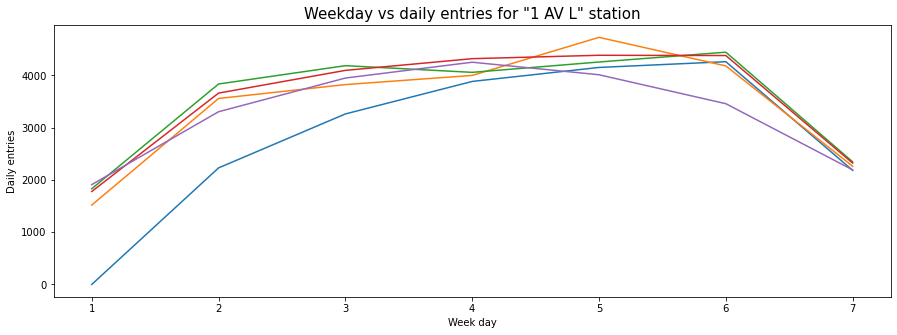

In [299]:
x = np.arange(1,8) # weekdays from 1 to 7
weeks = get_week_list(input_frame, column_name, num_days)

plt.figure(figsize = (15, 5))
plt.xlabel('Week day')
plt.ylabel('Daily entries')
plt.title('Weekday vs daily entries for "1 AV L" station',  size=15)
for i in weeks[:5]:   # plotting 5 weeks for a single station
    legend_text = []
    plt.plot(x, i);
# plt.legend()

# Challenge 9

## Viewing stations over entire time period

In [287]:
stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV L,03/17/2019,5.0
1,1 AV L,03/18/2019,2.0
2,1 AV L,03/19/2019,18473.0
3,1 AV L,03/20/2019,19996.0
4,1 AV L,03/21/2019,20027.0


In [288]:
grp_station_for_entire_time = stations_daily.groupby('STATION').sum().sort_values(by='DAILY_ENTRIES', ascending=False)

# Alternative method, returns a series:

# by_station = mta_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum().sort_values(ascending=False)

## 10 busiest stations overall:

In [289]:
grp_station_for_entire_time.head(10)

,DAILY_ENTRIES
STATION,
GRD CNTRL-42 ST 4567S,12553006.0
34 ST-HERALD SQ BDFMNQRW,10724485.0
42 ST-PORT AUTH ACENQRS1237W,7836685.0
34 ST-PENN STA ACE,7068245.0
14 ST-UNION SQ LNQR456W,6136401.0
TIMES SQ-42 ST 1237ACENQRSW,5988692.0
59 ST COLUMBUS ABCD1,5093300.0
FULTON ST 2345ACJZ,5064785.0
47-50 STS ROCK BDFM,4892421.0


# Challenge 10

## Visualizing the distribution of ridership levels: what levels of ridership are most common among stations?

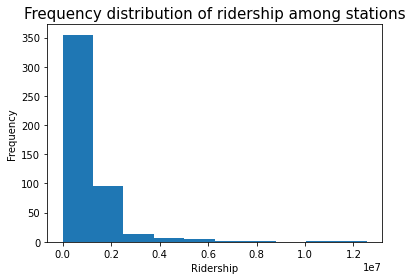

In [301]:
plt.hist(grp_station_for_entire_time)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Frequency distribution of ridership among stations", size=15);

Takeaway: the vast majority of stations, about 350, have low ridership -- between 0 and 2M. The top two stations, Grand Central and 34th St Herald Sq, have over 10M.

## Which stations take up most of the traffic?

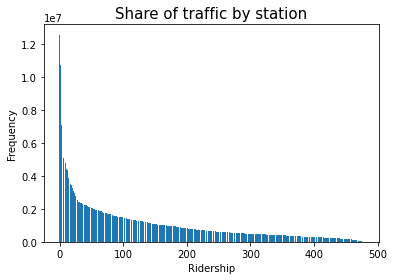

In [302]:
indices = range(len(grp_station_for_entire_time))
plt.bar(indices, grp_station_for_entire_time['DAILY_ENTRIES'])
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Share of traffic by station",  size=15);

Takeaway: the top two stations, Grand Central and 34th St Herald Sq, have massive ridership which then drops off sharply.